In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2  # Import L2 regularization
import pandas as pd
# Load the dataset
Data = pd.read_csv('DualBypass.csv')

In [2]:
Data.head()

,BPR1,BPR2,PR_HPC,PR_IPC,PR_LPC,TIT,TSCOR,TSF,TSFC,TSNoxR,SFC
0,0.2059,0.2059,5.891,4.540,4.202,2021,0.03402,118.5,99.97,0.1805,0.1200
1,0.2058,0.2058,5.890,4.539,4.201,2021,0.03397,118.9,99.71,0.1800,0.1196
2,0.0500,0.5707,8.253,2.000,7.505,2194,0.02799,124.8,99.94,0.1795,0.1199
3,0.2058,0.2058,5.888,4.538,4.201,2021,0.03392,119.2,99.44,0.1795,0.1193
4,0.2057,0.2057,5.887,4.537,4.200,2021,0.03387,119.6,99.18,0.1791,0.1190


In [3]:
import numpy as np

# Assuming Data is your dataset

# Generate synthetic data with 50 points
X = Data[['BPR1', 'BPR2', 'PR_HPC', 'PR_IPC', 'PR_LPC', 'TIT']].values

# Filter out bad data for TSFC, TSNoxR, and SFC
mask = np.all(np.isfinite(Data[['TSFC', 'TSNoxR', 'SFC']].values), axis=1)
y = Data[mask][['TSCOR', 'TSF', 'TSFC', 'TSNoxR', 'SFC']].values

In [4]:

# Clean X by removing rows with bad data
X = X[mask]

# Clean y by removing rows with bad data
y = y[mask]

In [5]:

# Normalize the input and output variables
scaler_x = StandardScaler()
inputs_norm = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
outputs_norm = scaler_y.fit_transform(y)



In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs_norm, outputs_norm, test_size=0.2, random_state=20)


In [7]:

from keras.optimizers import Adam
#500 300 200 epoch=100 #random state 20

# Define the Multi-Output MLP Regressor model with Dropout and L2 regularization
model_regularized_dropout = Sequential()
model_regularized_dropout.add(Dense(500
                                    ,input_dim=X.shape[1], activation='relu'))  # LSM
#odel_regularized_dropout.add(Dropout(0.1))  # LSM
model_regularized_dropout.add(Dense(300
                                    , activation='relu'))  # LSM
#odel_regularized_dropout.add(Dropout(0.1))  # LSM
model_regularized_dropout.add(Dense(200
                                    ,activation='relu'))  # LSM

model_regularized_dropout.add(Dense(5))  # Output layer with 2 units for two target variables


D:\anaconda-3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:

# Compile the model with mean squared error loss and Adam optimizer with custom learning rate
adam = Adam(learning_rate=1e-4)

model_regularized_dropout.compile(loss='mean_squared_error', optimizer=adam)

# Train the model with Dropout and L2 regularization
model_regularized_dropout.fit(X_train, y_train, epochs=100,
                              batch_size=32, verbose=1)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6184
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2844
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1827
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1163
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0952
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0818
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0647
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0518
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0423
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0376
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0267
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0222
Epoch 13/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0185
Epoch 14/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169
Epoch 15/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0142
Epoc

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.6673e-04
Epoch 82/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010    
Epoch 83/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014 
Epoch 84/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8463e-04
Epoch 85/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.4586e-04
Epoch 86/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 
Epoch 87/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038
Epoch 88/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.1153e-04
Epoch 89/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7882e-04
Epoch 90/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6966e-04
Epoch 91/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1648e-04
Epoch 92/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014  
Epoch 93/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.7283e-04
Epoch 94/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.4981e-04
Epoch 95/100
88/88 ━━━━━━━━━━━━

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


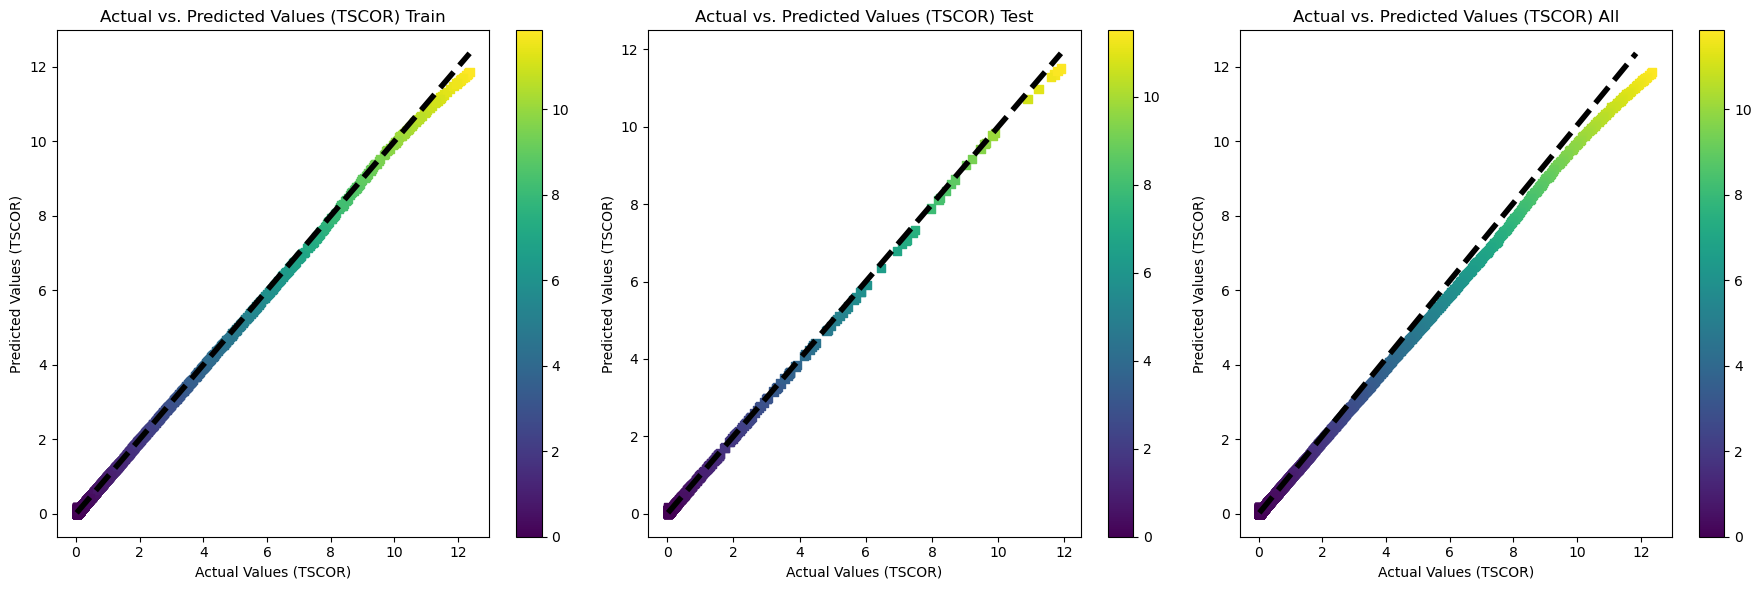

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Predict on the full dataset with the updated model
y_pred = model_regularized_dropout.predict(inputs_norm)

# Inverse transform the predicted values to get the original scale for filtered data
# Make predictions on the training and test data
y_pred_train = scaler_y.inverse_transform(model_regularized_dropout.predict(X_train))
y_pred_test = scaler_y.inverse_transform(model_regularized_dropout.predict(X_test))
y_pred_all =scaler_y.inverse_transform(y_pred) 


y_train=scaler_y.inverse_transform(y_train)
y_test=scaler_y.inverse_transform(y_test)

# Calculate the mean squared error of the predictions for both train and test sets

# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 0], y_pred_train[:, 0], c=y_pred_train[:, 0], cmap='viridis', marker='s')
plt.plot([y_train[:, 0].min(), y_train[:, 0].max()], [y_train[:, 0].min(), y_train[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 0], y_pred_test[:, 0], c=y_pred_test[:, 0], cmap='viridis', marker='s')
plt.plot([y_test[:, 0].min(), y_test[:, 0].max()], [y_test[:, 0].min(), y_test[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 0], y_pred_all[:, 0], c=y_pred_all[:, 0], cmap='viridis', marker='s')
plt.plot([y[:, 0].min(), y_pred_all[:, 0].max()], [y[:, 0].min(), y[:, 0].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSCOR)')
plt.ylabel('Predicted Values (TSCOR)')
plt.title('Actual vs. Predicted Values (TSCOR) All')
plt.colorbar()

plt.tight_layout()
plt.show()

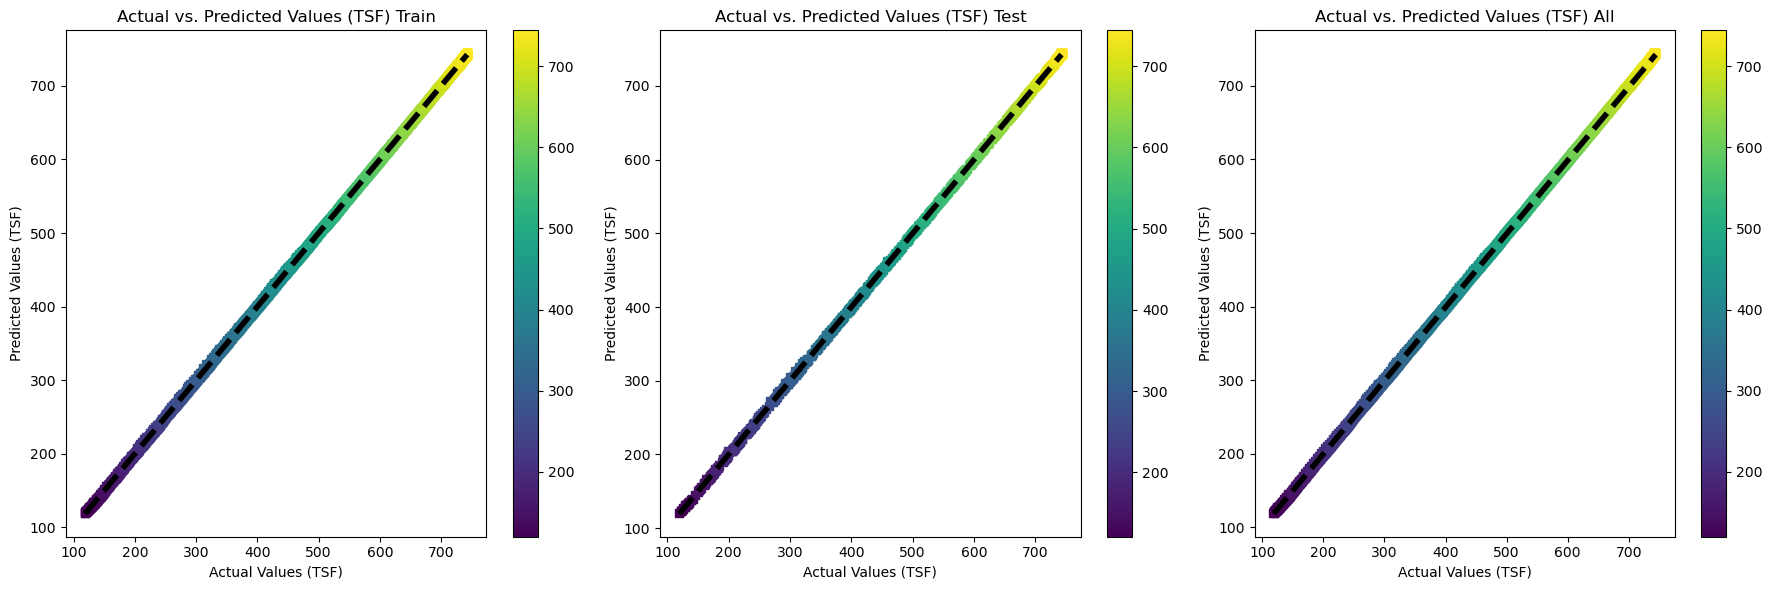

In [10]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 1], y_pred_train[:, 1], c=y_pred_train[:, 1], cmap='viridis', marker='s')
plt.plot([y_train[:, 1].min(), y_train[:, 1].max()], [y_train[:, 1].min(), y_train[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 1], y_pred_test[:, 1], c=y_pred_test[:, 1], cmap='viridis', marker='s')
plt.plot([y_test[:, 1].min(), y_test[:, 1].max()], [y_test[:, 1].min(), y_test[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 1], y_pred_all[:, 1], c=y_pred_all[:, 1], cmap='viridis', marker='s')
plt.plot([y[:, 1].min(), y_pred_all[:, 1].max()], [y[:, 1].min(), y[:, 1].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSF)')
plt.ylabel('Predicted Values (TSF)')
plt.title('Actual vs. Predicted Values (TSF) All')
plt.colorbar()

plt.tight_layout()
plt.show()

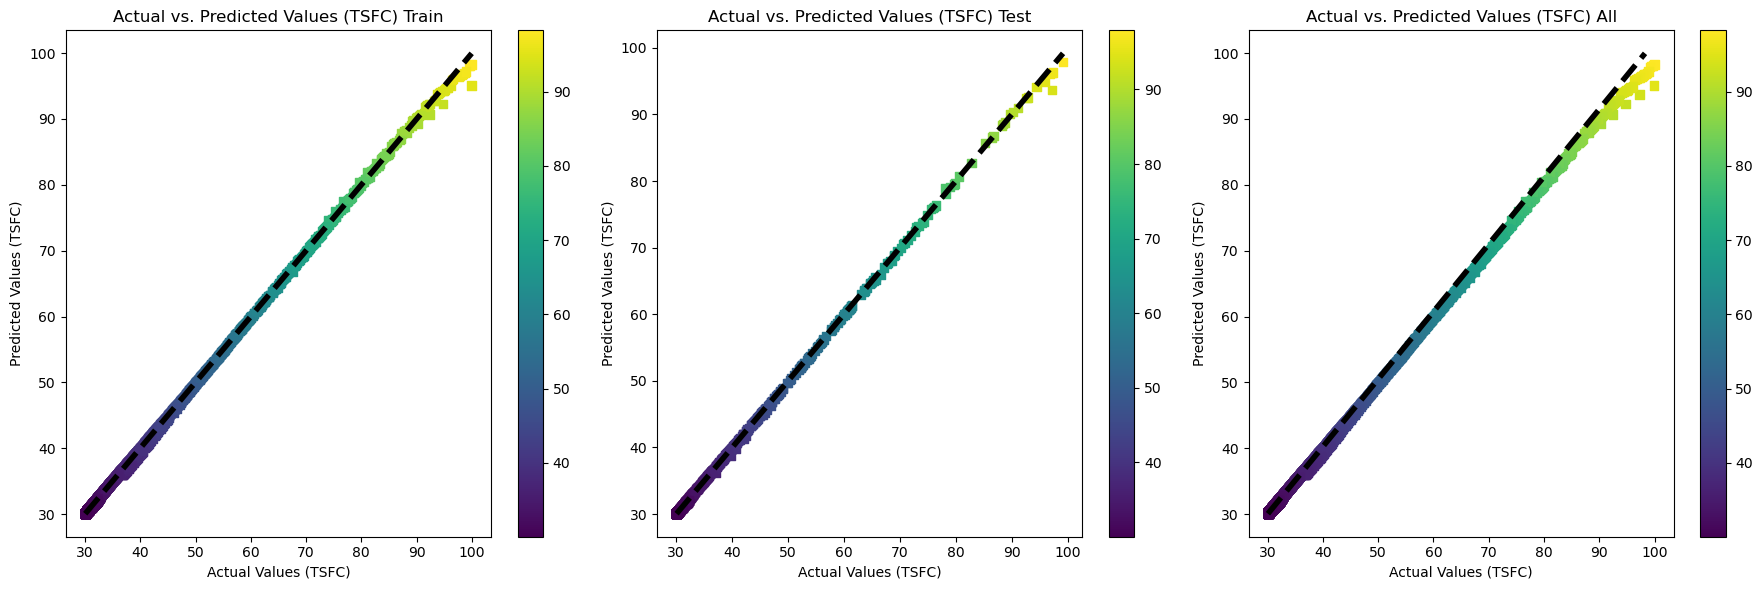

In [11]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 2], y_pred_train[:, 2], c=y_pred_train[:, 2], cmap='viridis', marker='s')
plt.plot([y_train[:, 2].min(), y_train[:, 2].max()], [y_train[:, 2].min(), y_train[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 2], y_pred_test[:, 2], c=y_pred_test[:, 2], cmap='viridis', marker='s')
plt.plot([y_test[:, 2].min(), y_test[:, 2].max()], [y_test[:, 2].min(), y_test[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 2], y_pred_all[:, 2], c=y_pred_all[:, 2], cmap='viridis', marker='s')
plt.plot([y[:, 2].min(), y_pred_all[:, 2].max()], [y[:, 2].min(), y[:, 2].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSFC)')
plt.ylabel('Predicted Values (TSFC)')
plt.title('Actual vs. Predicted Values (TSFC) All')
plt.colorbar()

plt.tight_layout()
plt.show()

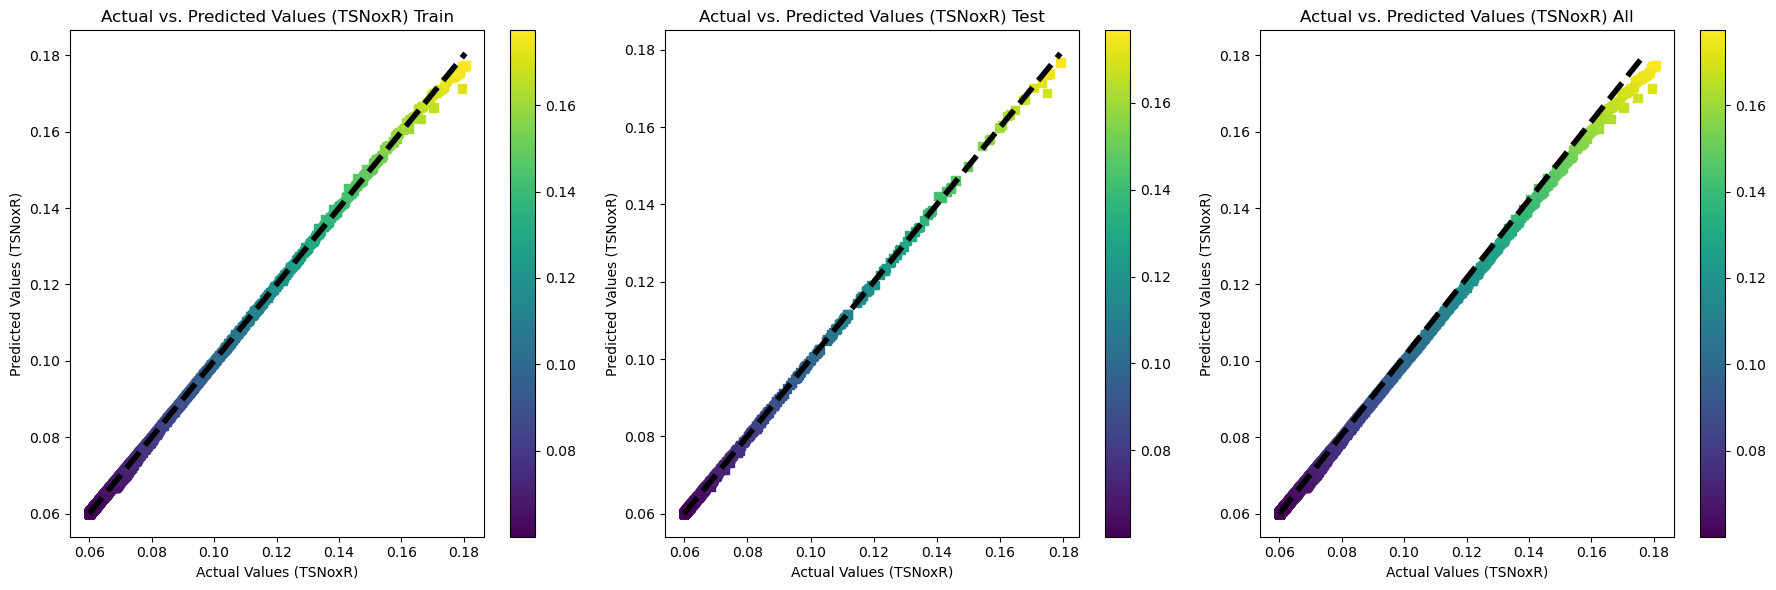

In [12]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 3], y_pred_train[:, 3], c=y_pred_train[:, 3], cmap='viridis', marker='s')
plt.plot([y_train[:, 3].min(), y_train[:, 3].max()], [y_train[:, 3].min(), y_train[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 3], y_pred_test[:, 3], c=y_pred_test[:, 3], cmap='viridis', marker='s')
plt.plot([y_test[:, 3].min(), y_test[:, 3].max()], [y_test[:, 3].min(), y_test[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 3], y_pred_all[:, 3], c=y_pred_all[:, 3], cmap='viridis', marker='s')
plt.plot([y[:, 3].min(), y_pred_all[:, 3].max()], [y[:, 3].min(), y[:, 3].max()], 'k--', lw=4)
plt.xlabel('Actual Values (TSNoxR)')
plt.ylabel('Predicted Values (TSNoxR)')
plt.title('Actual vs. Predicted Values (TSNoxR) All')
plt.colorbar()

plt.tight_layout()
plt.show()

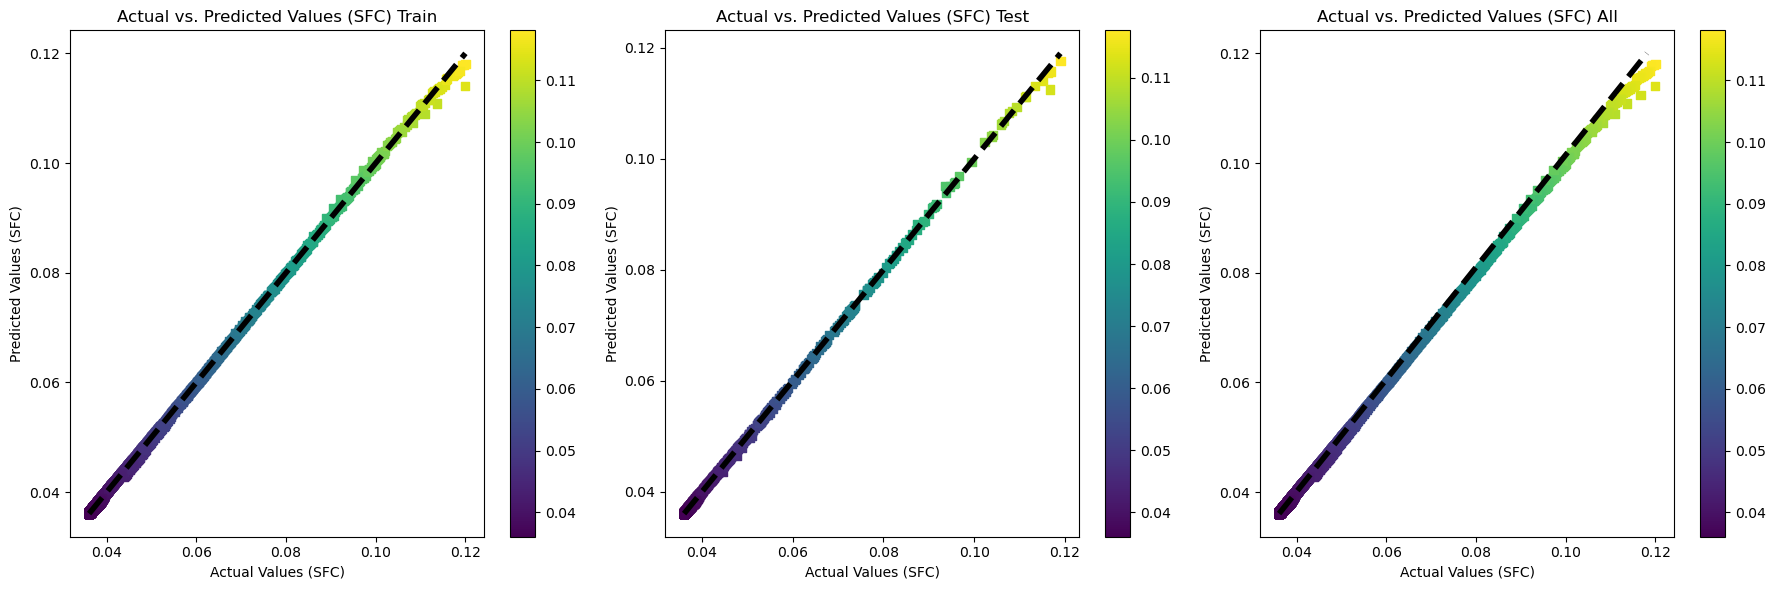

In [13]:
# Visualize the scatter plot for both train, test, and all data sets with the first target variable
plt.figure(figsize=(18, 6))
#y = Data[['TSCOR','TSF','TSFC','','']].values

# Plot for training set
plt.subplot(1, 3, 1)
plt.scatter(y_train[:, 4], y_pred_train[:, 4], c=y_pred_train[:, 4], cmap='viridis', marker='s')
plt.plot([y_train[:, 4].min(), y_train[:, 4].max()], [y_train[:, 4].min(), y_train[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) Train')
plt.colorbar()

# Plot for testing set
plt.subplot(1, 3, 2)
plt.scatter(y_test[:, 4], y_pred_test[:, 4], c=y_pred_test[:, 4], cmap='viridis', marker='s')
plt.plot([y_test[:, 4].min(), y_test[:, 4].max()], [y_test[:, 4].min(), y_test[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) Test')
plt.colorbar()

# Plot for all data
plt.subplot(1, 3, 3)
plt.scatter(y[:, 4], y_pred_all[:, 4], c=y_pred_all[:, 4], cmap='viridis', marker='s')
plt.plot([y[:, 4].min(), y_pred_all[:, 4].max()], [y[:, 4].min(), y[:, 4].max()], 'k--', lw=4)
plt.xlabel('Actual Values (SFC)')
plt.ylabel('Predicted Values (SFC)')
plt.title('Actual vs. Predicted Values (SFC) All')
plt.colorbar()

plt.tight_layout()
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [15]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 0], y_pred_test[:, 0])
mse = mean_squared_error(y_test[:, 0], y_pred_test[:, 0])
rmse = mean_squared_error(y_test[:, 0], y_pred_test[:, 0], squared=False)
mae = mean_absolute_error(y_test[:, 0], y_pred_test[:, 0])

print("Test Set Metrics:")
print("R2 Score: (TSCOR)", r2)
print("Mean Squared Error: (TSCOR)", mse)
print("Root Mean Squared Error:(TSCOR)", rmse)
print("Mean Absolute Error:(TSCOR)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 0], y_pred_train[:, 0])
mse_train = mean_squared_error(y_train[:, 0], y_pred_train[:, 0])
rmse_train = mean_squared_error(y_train[:, 0], y_pred_train[:, 0], squared=False)
mae_train = mean_absolute_error(y_train[:, 0], y_pred_train[:, 0])

print("\nTrain Set Metrics:")
print("R2 Score: (TSCOR)", r2_train)
print("Mean Squared Error: (TSCOR)", mse_train)
print("Root Mean Squared Error: (TSCOR)", rmse_train)
print("Mean Absolute Error:(TSCOR)", mae_train)



Test Set Metrics:
R2 Score: (TSCOR) 0.9994987643122518
Mean Squared Error: (TSCOR) 0.0019054257288642095
Root Mean Squared Error:(TSCOR) 0.04365118244520084
Mean Absolute Error:(TSCOR) 0.024508853846049845

Train Set Metrics:
R2 Score: (TSCOR) 0.9995043178760509
Mean Squared Error: (TSCOR) 0.0023874427019880003
Root Mean Squared Error: (TSCOR) 0.04886146438644671
Mean Absolute Error:(TSCOR) 0.026952169051031344


In [16]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 1], y_pred_test[:, 1])
mse = mean_squared_error(y_test[:, 1], y_pred_test[:, 1])
rmse = mean_squared_error(y_test[:, 1], y_pred_test[:, 1], squared=False)
mae = mean_absolute_error(y_test[:, 1], y_pred_test[:, 1])

print("Test Set Metrics:")
print("R2 Score: (TSF)", r2)
print("Mean Squared Error: (TSF)", mse)
print("Root Mean Squared Error:(TSF)", rmse)
print("Mean Absolute Error:(TSF)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 1], y_pred_train[:, 1])
mse_train = mean_squared_error(y_train[:, 1], y_pred_train[:, 1])
rmse_train = mean_squared_error(y_train[:, 1], y_pred_train[:, 1], squared=False)
mae_train = mean_absolute_error(y_train[:, 1], y_pred_train[:, 1])

print("\nTrain Set Metrics:")
print("R2 Score: (TSF)", r2_train)
print("Mean Squared Error: (TSF)", mse_train)
print("Root Mean Squared Error: (TSF)", rmse_train)
print("Mean Absolute Error:(TSF)", mae_train)

Test Set Metrics:
R2 Score: (TSF) 0.9999800926283933
Mean Squared Error: (TSF) 0.6973443939504376
Root Mean Squared Error:(TSF) 0.8350714903230966
Mean Absolute Error:(TSF) 0.5197412422822298

Train Set Metrics:
R2 Score: (TSF) 0.9999798387053219
Mean Squared Error: (TSF) 0.7115815977933496
Root Mean Squared Error: (TSF) 0.8435529608704777
Mean Absolute Error:(TSF) 0.5533087153846589


In [17]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 3], y_pred_test[:, 3])
mse = mean_squared_error(y_test[:, 3], y_pred_test[:, 3])
rmse = mean_squared_error(y_test[:, 3], y_pred_test[:, 3], squared=False)
mae = mean_absolute_error(y_test[:, 3], y_pred_test[:, 3])

print("Test Set Metrics:")
print("R2 Score: (TSNoxR)", r2)
print("Mean Squared Error: (TSNoxR)", mse)
print("Root Mean Squared Error:(TSNoxR)", rmse)
print("Mean Absolute Error:(TSNoxR)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 3], y_pred_train[:, 3])
mse_train = mean_squared_error(y_train[:, 3], y_pred_train[:, 3])
rmse_train = mean_squared_error(y_train[:, 3], y_pred_train[:, 3], squared=False)
mae_train = mean_absolute_error(y_train[:, 3], y_pred_train[:, 3])

print("\nTrain Set Metrics:")
print("R2 Score: (TSNoxR)", r2_train)
print("Mean Squared Error: (TSNoxR)", mse_train)
print("Root Mean Squared Error: (TSNoxR)", rmse_train)
print("Mean Absolute Error:(TSNoxR)", mae_train)

Test Set Metrics:
R2 Score: (TSNoxR) 0.9997675341874203
Mean Squared Error: (TSNoxR) 1.326095879850845e-07
Root Mean Squared Error:(TSNoxR) 0.00036415599402602795
Mean Absolute Error:(TSNoxR) 0.0001771867281292032

Train Set Metrics:
R2 Score: (TSNoxR) 0.9997313984814964
Mean Squared Error: (TSNoxR) 1.437852961225004e-07
Root Mean Squared Error: (TSNoxR) 0.0003791903164935787
Mean Absolute Error:(TSNoxR) 0.00019151496763317858


In [18]:

# Calculate metrics on the test set
r2 = r2_score(y_test[:, 4], y_pred_test[:, 4])
mse = mean_squared_error(y_test[:, 4], y_pred_test[:, 4])
rmse = mean_squared_error(y_test[:, 4], y_pred_test[:, 4], squared=False)
mae = mean_absolute_error(y_test[:, 4], y_pred_test[:, 4])

print("Test Set Metrics:")
print("R2 Score: (TSFCC)", r2)
print("Mean Squared Error: (TSFCC)", mse)
print("Root Mean Squared Error:(TSFCC)", rmse)
print("Mean Absolute Error:(TSFCC)", mae)

# Calculate metrics on the training set
r2_train = r2_score(y_train[:, 4], y_pred_train[:, 4])
mse_train = mean_squared_error(y_train[:, 4], y_pred_train[:, 4])
rmse_train = mean_squared_error(y_train[:, 4], y_pred_train[:, 4], squared=False)
mae_train = mean_absolute_error(y_train[:, 4], y_pred_train[:, 4])

print("\nTrain Set Metrics:")
print("R2 Score: (TSFCC)", r2_train)
print("Mean Squared Error: (TSFCC)", mse_train)
print("Root Mean Squared Error: (TSFCC)", rmse_train)
print("Mean Absolute Error:(TSFCC)", mae_train)



Test Set Metrics:
R2 Score: (TSFCC) 0.9997780668904703
Mean Squared Error: (TSFCC) 6.447504505586576e-08
Root Mean Squared Error:(TSFCC) 0.00025391936723272163
Mean Absolute Error:(TSFCC) 0.00013530605367008863

Train Set Metrics:
R2 Score: (TSFCC) 0.9997491394227864
Mean Squared Error: (TSFCC) 6.884762040959676e-08
Root Mean Squared Error: (TSFCC) 0.00026238830082455424
Mean Absolute Error:(TSFCC) 0.0001460868253208414
